In [6]:
#Módulos
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

#Se importan los datos
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

h = .02

#Parámetro de regularización
C = 1.0 

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [2]:
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

#Probé pero no me gustó el resultado con sigmoid
#sigmoid_svc=svm.SVC(kernel='sigmoid').fit(X,y)

/home/angel/.virtualenvs/asr_audio/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [3]:
#Se crean los marcos para las gráficas

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

#Títulos para las gráficas
titles = ['SVC con kernel lineal',
 'Lineal SVC',
 'SVC con RBF kernel',
 'SVC con polinomio(grado 3) kernel']

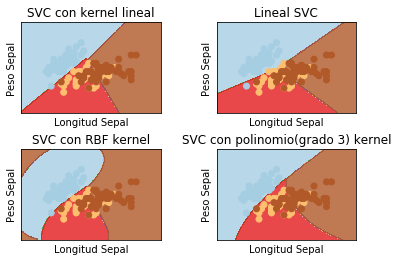

In [4]:
for i, clf in enumerate((svc,lin_svc, rbf_svc, poly_svc)):
 # Se grafican las fronteras 
 plt.subplot(2, 2, i + 1)
 plt.subplots_adjust(wspace=0.4, hspace=0.4)

 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

 #Color en las gráficas
 Z = Z.reshape(xx.shape)
 plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

 #Puntos de entrenamiento
 plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
 plt.xlabel('Longitud Sepal')
 plt.ylabel('Peso Sepal')
 plt.xlim(xx.min(), xx.max())
 plt.ylim(yy.min(), yy.max())
 plt.xticks(())
 plt.yticks(())
 plt.title(titles[i])

plt.show()
